In [4]:
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Task 4: Order to Cash Process

In [5]:
# Create the Petri Net
net = PetriNet("order_to_cash")

# Creating places
source = PetriNet.Place("source")
sink = PetriNet.Place("sink")
p_1 = PetriNet.Place("p_1")
p_2 = PetriNet.Place("p_2")
p_3 = PetriNet.Place("p_3")
p_4 = PetriNet.Place("p_4")
p_5 = PetriNet.Place("p_5")
p_6 = PetriNet.Place("p_6")

# Add the places to the Petri Net
net.places.add(source)
net.places.add(sink)
net.places.add(p_1)
net.places.add(p_2)
net.places.add(p_3)
net.places.add(p_4)
net.places.add(p_5)
net.places.add(p_6)

# Create transitions
t_1 = PetriNet.Transition("place_order", "place_order")
t_2 = PetriNet.Transition("send_invoice", "send_invoice")
t_3 = PetriNet.Transition("send_reminder", "send_reminder")
t_4 = PetriNet.Transition("pay", "pay")
t_5 = PetriNet.Transition("prepare_delivery", "prepare_delivery")
t_6 = PetriNet.Transition("make_delivery", "make_delivery")
t_7 = PetriNet.Transition("confirm_payment", "confirm_payment")

# Create silent Transitions
empty_t1 = PetriNet.Transition("hid_1", None)

# Add the transitions to the Petri Net
net.transitions.add(t_1)
net.transitions.add(t_2)
net.transitions.add(t_3)
net.transitions.add(t_4)
net.transitions.add(t_5)
net.transitions.add(t_6)
net.transitions.add(t_7)

# Add silent Transitions
net.transitions.add(empty_t1)

# Add arcs
petri_utils.add_arc_from_to(source, t_1, net)
petri_utils.add_arc_from_to(t_1, p_1, net)
petri_utils.add_arc_from_to(p_1, t_2, net)
petri_utils.add_arc_from_to(t_2, p_2, net)
petri_utils.add_arc_from_to(p_2, t_3, net)
petri_utils.add_arc_from_to(t_3, p_3, net)
petri_utils.add_arc_from_to(p_2, empty_t1, net)
petri_utils.add_arc_from_to(empty_t1, p_3, net)
petri_utils.add_arc_from_to(p_3, t_4, net)
petri_utils.add_arc_from_to(t_4, p_4, net)
petri_utils.add_arc_from_to(p_4, t_5, net)
petri_utils.add_arc_from_to(t_5, p_5, net)
petri_utils.add_arc_from_to(p_5, t_6, net)
petri_utils.add_arc_from_to(t_6, p_6, net)
petri_utils.add_arc_from_to(p_6, t_7, net)
petri_utils.add_arc_from_to(t_7, sink, net)

# Adding tokens
initial_marking = Marking()
initial_marking[source] = 1
final_marking = Marking()
final_marking[sink] = 1

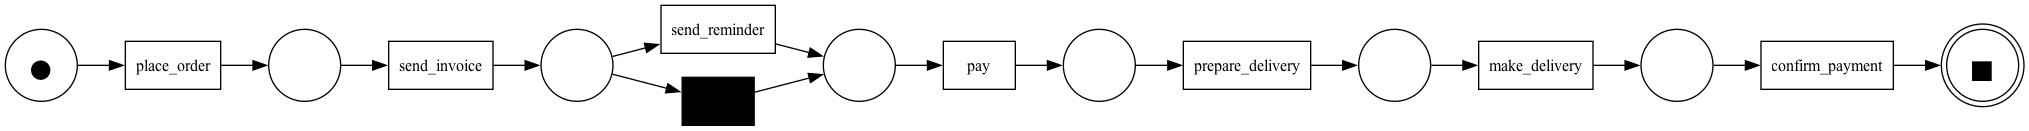

In [6]:
# Visualize the Petri Net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

# Task 5: Reachability Graph

In [7]:

from pm4py.objects.petri_net.utils import reachability_graph as rg
from pm4py.visualization.transition_system import visualizer as ts_visualizer

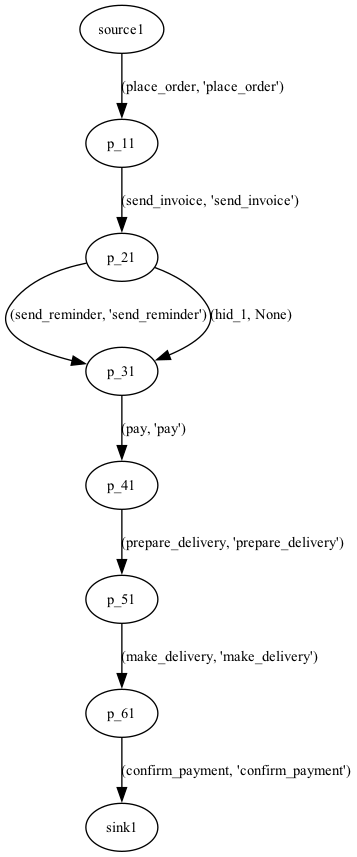

In [8]:
reachability_graph = rg.construct_reachability_graph(net, initial_marking)
gviz_rg = ts_visualizer.apply(reachability_graph)
ts_visualizer.view(gviz_rg)

# Task 6: Simulate the Petri Net

In [9]:

from pm4py.algo.simulation.playout.petri_net import algorithm as simulator

In [10]:
simulated_log = simulator.apply(net, initial_marking, variant=simulator.Variants.EXTENSIVE)
unique_traces = set()

for trace in simulated_log:
    trace_events = [event["concept:name"] for event in trace]
    unique_traces.add(tuple(trace_events))
for trace in unique_traces:
    print("Trace length:", len(trace))
    print("Trace events:", trace)


Trace length: 7
Trace events: ('place_order', 'send_invoice', 'send_reminder', 'pay', 'prepare_delivery', 'make_delivery', 'confirm_payment')
Trace length: 6
Trace events: ('place_order', 'send_invoice', 'pay', 'prepare_delivery', 'make_delivery', 'confirm_payment')
